In [1]:
!pip install ultralytics opencv-python scikit-learn tensorflow tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00


In [1]:
from google.colab import files
uploaded = files.upload()


Saving UnderWaterClassificationDay3.v1i.yolov8.zip to UnderWaterClassificationDay3.v1i.yolov8.zip


In [2]:
import zipfile, os

zip_path = "UnderWaterClassificationDay3.v1i.yolov8.zip"
extract_path = "/content/underwater"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted!")


Dataset extracted!


In [7]:
!pip install ultralytics

from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # lightweight

model.train(
    data=f"{extract_path}/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/underwater/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798bf6fe2780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
import cv2
import os
from tqdm import tqdm

detector = YOLO("runs/detect/train/weights/best.pt")

OUTPUT_DIR = "/content/cropped"
os.makedirs(f"{OUTPUT_DIR}/fish", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/coral", exist_ok=True)

image_dir = f"{extract_path}/test/images"

for img_name in tqdm(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)

    results = detector(img)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])
            label = r.names[cls]

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = img[y1:y2, x1:x2]

            if crop.size == 0:
                continue

            save_path = f"{OUTPUT_DIR}/{label}/{img_name}"
            cv2.imwrite(save_path, crop)


  0%|          | 0/50 [00:00<?, ?it/s]


0: 640x640 12 Fishs, 7 corals, 9.3ms
Speed: 4.1ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 1/50 [00:00<00:07,  6.96it/s]


0: 640x640 13 Fishs, 4 corals, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 6 corals, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 8 corals, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Fishs, 6 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 14 Fishs, 7 corals, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 6/50 [00:00<00:01, 28.20it/s]


0: 640x640 4 Fishs, 7 corals, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 49 Fishs, 26 corals, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 37 Fishs, 20 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 Fishs, 7 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 Fishs, 6 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 11/50 [00:00<00:01, 35.17it/s]


0: 640x640 45 Fishs, 22 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 40 Fishs, 17 corals, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 45 Fishs, 21 corals, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 Fishs, 8 corals, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 15/50 [00:00<00:00, 36.31it/s]


0: 640x640 13 Fishs, 9 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 8 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 Fishs, 19 corals, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 7 corals, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 23 Fishs, 17 corals, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 20/50 [00:00<00:00, 39.31it/s]


0: 640x640 18 Fishs, 8 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 40 Fishs, 21 corals, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 40 Fishs, 19 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 Fishs, 7 corals, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 Fishs, 14 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 25/50 [00:00<00:00, 40.08it/s]


0: 640x640 10 Fishs, 4 corals, 9.9ms
Speed: 3.2ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 42 Fishs, 19 corals, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 Fishs, 16 corals, 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 41 Fishs, 17 corals, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 Fishs, 7 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 30/50 [00:00<00:00, 39.92it/s]


0: 640x640 26 Fishs, 15 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 Fishs, 4 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 29 Fishs, 17 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 38 Fishs, 21 corals, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 33 Fishs, 16 corals, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 35/50 [00:00<00:00, 40.17it/s]


0: 640x640 17 Fishs, 7 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 23 Fishs, 19 corals, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 40 Fishs, 20 corals, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 9 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 Fishs, 19 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 40/50 [00:01<00:00, 40.70it/s]


0: 640x640 14 Fishs, 7 corals, 7.2ms
Speed: 3.4ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 Fishs, 9 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 Fishs, 4 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 6 corals, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 Fishs, 16 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 45/50 [00:01<00:00, 42.28it/s]


0: 640x640 23 Fishs, 11 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 Fishs, 3 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 26 Fishs, 18 corals, 7.2ms
Speed: 3.2ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 Fishs, 7 corals, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 Fishs, 7 corals, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 50/50 [00:01<00:00, 38.86it/s]


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

cnn = ResNet50(weights="imagenet", include_top=False, pooling="avg")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
def extract_features(folder):
    features = []
    filenames = []

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        feat = cnn.predict(img, verbose=0)
        features.append(feat[0])
        filenames.append(img_name)

    return np.array(features), filenames


In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [12]:
fish_features, fish_names = extract_features(f"{OUTPUT_DIR}/fish")

fish_scaled = StandardScaler().fit_transform(fish_features)

dbscan_fish = DBSCAN(eps=0.8, min_samples=5)
fish_clusters = dbscan_fish.fit_predict(fish_scaled)

print("Fish clusters:", set(fish_clusters))


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
coral_features, coral_names = extract_features(f"{OUTPUT_DIR}/coral")

coral_scaled = StandardScaler().fit_transform(coral_features)

dbscan_coral = DBSCAN(eps=0.8, min_samples=5)
coral_clusters = dbscan_coral.fit_predict(coral_scaled)

print("Coral clusters:", set(coral_clusters))


Coral clusters: {np.int64(-1)}


In [14]:
import os

print("Fish images:", len(os.listdir(f"{OUTPUT_DIR}/fish")))
print("Coral images:", len(os.listdir(f"{OUTPUT_DIR}/coral")))


Fish images: 0
Coral images: 50


In [15]:
print(detector.names)


{0: 'Fish', 1: 'coral'}


In [16]:
label = r.names[cls].lower()


In [17]:
# DELETE old crops first
!rm -rf /content/cropped


In [20]:
FISH_CLASS_ID = 0    # adjust after printing detector.names
CORAL_CLASS_ID = 1  # adjust if needed

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)

    results = detector(img)

    for r in results:
        for box in r.boxes:
            cls = int(box.cls[0])

            if cls == FISH_CLASS_ID:
                label = "fish"
            elif cls == CORAL_CLASS_ID:
                label = "coral"
            else:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = img[y1:y2, x1:x2]

            if crop.size == 0:
                continue

            save_path = f"{OUTPUT_DIR}/{label}/{img_name}"
            cv2.imwrite(save_path, crop)



0: 640x640 12 Fishs, 7 corals, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 Fishs, 4 corals, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 6 corals, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 8 corals, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Fishs, 6 corals, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 14 Fishs, 7 corals, 7.3ms
Speed: 2.3ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Fishs, 7 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 49 Fishs, 26 corals, 7.2ms
Speed: 2.9ms preprocess

In [21]:
!rm -rf /content/cropped
os.makedirs("/content/cropped/fish", exist_ok=True)
os.makedirs("/content/cropped/coral", exist_ok=True)


In [22]:
print("Fish images:", len(os.listdir("/content/cropped/fish")))
print("Coral images:", len(os.listdir("/content/cropped/coral")))


Fish images: 0
Coral images: 0


In [23]:
from ultralytics import YOLO
detector = YOLO("runs/detect/train/weights/best.pt")
print("Model loaded")


Model loaded


In [24]:
print(detector.names)


{0: 'Fish', 1: 'coral'}


In [25]:
!rm -rf /content/cropped


In [26]:
import os
import cv2
from tqdm import tqdm

# Paths
image_dir = "/content/underwater/test/images"
OUTPUT_DIR = "/content/cropped"

# Create output folders
os.makedirs(f"{OUTPUT_DIR}/fish", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/coral", exist_ok=True)

# Class IDs (CONFIRMED)
FISH_CLASS_ID = 0
CORAL_CLASS_ID = 1

for img_name in tqdm(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    # Lower confidence to catch fish
    results = detector(img, conf=0.1)

    for r in results:
        if r.boxes is None:
            continue

        for box in r.boxes:
            cls = int(box.cls[0])

            if cls == FISH_CLASS_ID:
                label = "fish"
            elif cls == CORAL_CLASS_ID:
                label = "coral"
            else:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = img[y1:y2, x1:x2]

            if crop is None or crop.size == 0:
                continue

            save_name = f"{label}_{img_name}"
            cv2.imwrite(f"{OUTPUT_DIR}/{label}/{save_name}", crop)


  0%|          | 0/50 [00:00<?, ?it/s]


0: 640x640 17 Fishs, 7 corals, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 Fishs, 5 corals, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 18 Fishs, 7 corals, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 3/50 [00:00<00:01, 24.46it/s]


0: 640x640 19 Fishs, 11 corals, 9.4ms
Speed: 4.2ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 Fishs, 8 corals, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 Fishs, 9 corals, 10.8ms
Speed: 4.1ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 Fishs, 7 corals, 10.4ms
Speed: 4.7ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 7/50 [00:00<00:01, 30.42it/s]


0: 640x640 67 Fishs, 27 corals, 10.3ms
Speed: 4.5ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 45 Fishs, 23 corals, 7.6ms
Speed: 5.1ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 7 corals, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 Fishs, 8 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 11/50 [00:00<00:01, 26.94it/s]


0: 640x640 59 Fishs, 27 corals, 12.0ms
Speed: 5.1ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 53 Fishs, 20 corals, 13.0ms
Speed: 4.5ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 58 Fishs, 22 corals, 8.1ms
Speed: 5.5ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 14/50 [00:00<00:01, 23.61it/s]


0: 640x640 26 Fishs, 9 corals, 7.5ms
Speed: 4.3ms preprocess, 7.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 Fishs, 10 corals, 8.2ms
Speed: 3.7ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 Fishs, 8 corals, 7.2ms
Speed: 4.0ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 Fishs, 21 corals, 7.3ms
Speed: 3.7ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 18/50 [00:00<00:01, 26.21it/s]


0: 640x640 22 Fishs, 9 corals, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 30 Fishs, 21 corals, 7.9ms
Speed: 4.2ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 Fishs, 8 corals, 7.6ms
Speed: 4.1ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 21/50 [00:00<00:01, 27.12it/s]


0: 640x640 50 Fishs, 24 corals, 7.5ms
Speed: 3.9ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 52 Fishs, 23 corals, 7.6ms
Speed: 3.2ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 Fishs, 7 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 24/50 [00:00<00:00, 27.17it/s]


0: 640x640 41 Fishs, 18 corals, 7.9ms
Speed: 3.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 Fishs, 5 corals, 7.5ms
Speed: 3.4ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 54 Fishs, 22 corals, 7.5ms
Speed: 3.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 27/50 [00:01<00:00, 27.84it/s]


0: 640x640 29 Fishs, 20 corals, 7.7ms
Speed: 3.4ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 57 Fishs, 18 corals, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 18 Fishs, 9 corals, 8.1ms
Speed: 4.0ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 30/50 [00:01<00:00, 27.90it/s]


0: 640x640 35 Fishs, 18 corals, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 Fishs, 5 corals, 10.9ms
Speed: 4.4ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 37 Fishs, 17 corals, 9.1ms
Speed: 3.3ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 33/50 [00:01<00:00, 27.44it/s]


0: 640x640 44 Fishs, 23 corals, 9.8ms
Speed: 3.6ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 42 Fishs, 17 corals, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 Fishs, 8 corals, 8.0ms
Speed: 3.3ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 36/50 [00:01<00:00, 27.87it/s]


0: 640x640 35 Fishs, 24 corals, 7.3ms
Speed: 3.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 55 Fishs, 23 corals, 9.1ms
Speed: 3.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 Fishs, 9 corals, 7.3ms
Speed: 3.7ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 39/50 [00:01<00:00, 28.16it/s]


0: 640x640 43 Fishs, 25 corals, 7.6ms
Speed: 3.3ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 Fishs, 7 corals, 9.4ms
Speed: 3.6ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 Fishs, 11 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 5 corals, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 43/50 [00:01<00:00, 29.37it/s]


0: 640x640 22 Fishs, 6 corals, 11.8ms
Speed: 6.3ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 Fishs, 20 corals, 7.3ms
Speed: 4.3ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 34 Fishs, 14 corals, 7.5ms
Speed: 4.8ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 46/50 [00:01<00:00, 28.94it/s]


0: 640x640 18 Fishs, 5 corals, 7.3ms
Speed: 5.1ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 35 Fishs, 24 corals, 7.3ms
Speed: 4.1ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 30 Fishs, 7 corals, 9.9ms
Speed: 4.3ms preprocess, 9.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 49/50 [00:01<00:00, 28.80it/s]


0: 640x640 17 Fishs, 8 corals, 12.7ms
Speed: 3.5ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 50/50 [00:01<00:00, 27.72it/s]


In [27]:
print("Fish images:", len(os.listdir("/content/cropped/fish")))
print("Coral images:", len(os.listdir("/content/cropped/coral")))


Fish images: 50
Coral images: 50


In [28]:
fish_features, fish_names = extract_features(f"{OUTPUT_DIR}/fish")

fish_scaled = StandardScaler().fit_transform(fish_features)

dbscan_fish = DBSCAN(eps=0.8, min_samples=5)
fish_clusters = dbscan_fish.fit_predict(fish_scaled)

print("Fish clusters:", set(fish_clusters))


Fish clusters: {np.int64(-1)}


In [29]:
coral_features, coral_names = extract_features(f"{OUTPUT_DIR}/coral")

coral_scaled = StandardScaler().fit_transform(coral_features)

dbscan_coral = DBSCAN(eps=0.8, min_samples=5)
coral_clusters = dbscan_coral.fit_predict(coral_scaled)

print("Coral clusters:", set(coral_clusters))


Coral clusters: {np.int64(-1)}


In [30]:
print("Total coral images:", len(coral_features))


Total coral images: 50


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
coral_pca = pca.fit_transform(coral_scaled)


In [32]:
from sklearn.cluster import DBSCAN

dbscan_coral = DBSCAN(
    eps=1.5,        # bigger radius
    min_samples=3   # allow small clusters
)

coral_clusters = dbscan_coral.fit_predict(coral_pca)
print("Coral clusters:", set(coral_clusters))


Coral clusters: {np.int64(-1)}


In [33]:
def save_clusters(names, clusters, src_folder, dst_folder):
    for name, cluster in zip(names, clusters):
        if cluster == -1:
            continue
        cluster_dir = f"{dst_folder}/cluster_{cluster}"
        os.makedirs(cluster_dir, exist_ok=True)

        os.system(f"cp {src_folder}/{name} {cluster_dir}/{name}")


In [34]:
save_clusters(fish_names, fish_clusters, f"{OUTPUT_DIR}/fish", "/content/fish_clusters")
save_clusters(coral_names, coral_clusters, f"{OUTPUT_DIR}/coral", "/content/coral_clusters")


In [35]:
!ls /content/cropped/fish | head
!ls /content/cropped/coral | head


fish_20s_mp4-0046_jpg.rf.7273f09a75ba5b711a9c4c17a3bf78f4.jpg
fish_20s_mp4-0055_jpg.rf.a8841300dd7d6a9247aa85f7f9ee1973.jpg
fish_20s_mp4-0061_jpg.rf.6ff881844b8d5339dafa3f8befeefae4.jpg
fish_20s_mp4-0063_jpg.rf.ed3fcdf393b700096b26fabfa508e4cd.jpg
fish_20s_mp4-0086_jpg.rf.7f6e5d5b7a7ded837b4169f1013d250d.jpg
fish_20s_mp4-0096_jpg.rf.00b1d9147df7ea1c6560da9ad89ca1aa.jpg
fish_20s_mp4-0097_jpg.rf.c69a54f295d8d8ab0a68746049a52730.jpg
fish_20s_mp4-0107_jpg.rf.ba58ee3306bc3aec740b35f903e9174b.jpg
fish_20s_mp4-0117_jpg.rf.b44f8e9a473de6b8b847f23e8cb27870.jpg
fish_20s_mp4-0118_jpg.rf.a9e1133811d4fb60adb8aca628941453.jpg
coral_20s_mp4-0046_jpg.rf.7273f09a75ba5b711a9c4c17a3bf78f4.jpg
coral_20s_mp4-0055_jpg.rf.a8841300dd7d6a9247aa85f7f9ee1973.jpg
coral_20s_mp4-0061_jpg.rf.6ff881844b8d5339dafa3f8befeefae4.jpg
coral_20s_mp4-0063_jpg.rf.ed3fcdf393b700096b26fabfa508e4cd.jpg
coral_20s_mp4-0086_jpg.rf.7f6e5d5b7a7ded837b4169f1013d250d.jpg
coral_20s_mp4-0096_jpg.rf.00b1d9147df7ea1c6560da9ad89ca1aa.jpg
co

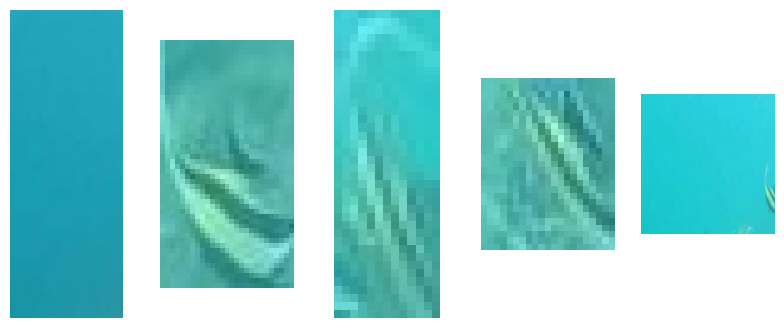

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

fish_dir = "/content/cropped/fish"
fish_imgs = os.listdir(fish_dir)[:5]

plt.figure(figsize=(10,4))
for i, img_name in enumerate(fish_imgs):
    img = cv2.imread(os.path.join(fish_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


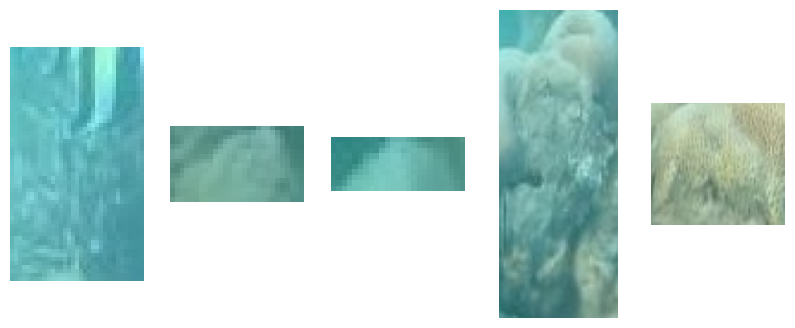

In [37]:
coral_dir = "/content/cropped/coral"
coral_imgs = os.listdir(coral_dir)[:5]

plt.figure(figsize=(10,4))
for i, img_name in enumerate(coral_imgs):
    img = cv2.imread(os.path.join(coral_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


In [38]:
!rm -rf /content/cropped


In [40]:
import cv2
import numpy as np

def resize_with_padding(img, size=224):
    h, w, _ = img.shape
    scale = size / max(h, w)
    nh, nw = int(h * scale), int(w * scale)

    img_resized = cv2.resize(img, (nw, nh))

    canvas = np.zeros((size, size, 3), dtype=np.uint8)
    y_offset = (size - nh) // 2
    x_offset = (size - nw) // 2

    canvas[y_offset:y_offset+nh, x_offset:x_offset+nw] = img_resized
    return canvas


In [41]:
import os
import cv2
from tqdm import tqdm

OUTPUT_DIR = "/content/cropped"
image_dir = "/content/underwater/test/images"

os.makedirs(f"{OUTPUT_DIR}/fish", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/coral", exist_ok=True)

FISH_CLASS_ID = 0
CORAL_CLASS_ID = 1

for img_name in tqdm(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    results = detector(img, conf=0.1)

    for r in results:
        if r.boxes is None:
            continue

        for box in r.boxes:
            cls = int(box.cls[0])

            if cls == FISH_CLASS_ID:
                label = "fish"
            elif cls == CORAL_CLASS_ID:
                label = "coral"
            else:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = img[y1:y2, x1:x2]

            if crop is None or crop.size == 0:
                continue

            crop = resize_with_padding(crop, size=224)

            save_name = f"{label}_{img_name}"
            cv2.imwrite(f"{OUTPUT_DIR}/{label}/{save_name}", crop)


  0%|          | 0/50 [00:00<?, ?it/s]


0: 640x640 17 Fishs, 7 corals, 30.3ms
Speed: 7.6ms preprocess, 30.3ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 1/50 [00:00<00:06,  7.64it/s]


0: 640x640 19 Fishs, 5 corals, 34.3ms
Speed: 10.3ms preprocess, 34.3ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 2/50 [00:00<00:06,  7.36it/s]


0: 640x640 18 Fishs, 7 corals, 9.0ms
Speed: 7.7ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 Fishs, 11 corals, 8.8ms
Speed: 3.3ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 Fishs, 8 corals, 8.9ms
Speed: 3.4ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 5/50 [00:00<00:03, 14.90it/s]


0: 640x640 15 Fishs, 9 corals, 30.4ms
Speed: 3.4ms preprocess, 30.4ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 Fishs, 7 corals, 11.3ms
Speed: 4.3ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 7/50 [00:00<00:03, 13.79it/s]


0: 640x640 67 Fishs, 27 corals, 12.1ms
Speed: 3.4ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 45 Fishs, 23 corals, 14.2ms
Speed: 5.1ms preprocess, 14.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 9/50 [00:00<00:03, 12.33it/s]


0: 640x640 17 Fishs, 7 corals, 11.8ms
Speed: 5.5ms preprocess, 11.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 Fishs, 8 corals, 12.9ms
Speed: 3.3ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 11/50 [00:00<00:02, 14.06it/s]


0: 640x640 59 Fishs, 27 corals, 12.9ms
Speed: 4.9ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 53 Fishs, 20 corals, 13.6ms
Speed: 5.4ms preprocess, 13.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 13/50 [00:01<00:03, 11.66it/s]


0: 640x640 58 Fishs, 22 corals, 12.4ms
Speed: 5.9ms preprocess, 12.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 26 Fishs, 9 corals, 12.2ms
Speed: 6.1ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 15/50 [00:01<00:02, 12.13it/s]


0: 640x640 22 Fishs, 10 corals, 11.1ms
Speed: 4.7ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 Fishs, 8 corals, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 Fishs, 21 corals, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 18/50 [00:01<00:02, 15.06it/s]


0: 640x640 22 Fishs, 9 corals, 8.0ms
Speed: 3.6ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 30 Fishs, 21 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 25 Fishs, 8 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 21/50 [00:01<00:01, 17.83it/s]


0: 640x640 50 Fishs, 24 corals, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 52 Fishs, 23 corals, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 23/50 [00:01<00:01, 17.40it/s]


0: 640x640 16 Fishs, 7 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 41 Fishs, 18 corals, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 Fishs, 5 corals, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 26/50 [00:01<00:01, 20.12it/s]


0: 640x640 54 Fishs, 22 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 29 Fishs, 20 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 57 Fishs, 18 corals, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 29/50 [00:01<00:01, 19.71it/s]


0: 640x640 18 Fishs, 9 corals, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 35 Fishs, 18 corals, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 Fishs, 5 corals, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 32/50 [00:01<00:00, 21.89it/s]


0: 640x640 37 Fishs, 17 corals, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 44 Fishs, 23 corals, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 42 Fishs, 17 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 35/50 [00:02<00:00, 21.23it/s]


0: 640x640 20 Fishs, 8 corals, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 35 Fishs, 24 corals, 7.4ms
Speed: 3.1ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 55 Fishs, 23 corals, 7.3ms
Speed: 3.5ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 38/50 [00:02<00:00, 20.99it/s]


0: 640x640 20 Fishs, 9 corals, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 43 Fishs, 25 corals, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 21 Fishs, 7 corals, 8.5ms
Speed: 3.3ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 41/50 [00:02<00:00, 21.66it/s]


0: 640x640 32 Fishs, 11 corals, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 5 corals, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 22 Fishs, 6 corals, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 44/50 [00:02<00:00, 23.14it/s]


0: 640x640 27 Fishs, 20 corals, 7.3ms
Speed: 3.6ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 34 Fishs, 14 corals, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 18 Fishs, 5 corals, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 47/50 [00:02<00:00, 22.79it/s]


0: 640x640 35 Fishs, 24 corals, 12.4ms
Speed: 4.6ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 30 Fishs, 7 corals, 11.3ms
Speed: 3.9ms preprocess, 11.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 Fishs, 8 corals, 7.8ms
Speed: 4.8ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 50/50 [00:02<00:00, 17.82it/s]


In [42]:
import cv2, os

img = cv2.imread("/content/cropped/fish/" + os.listdir("/content/cropped/fish")[0])
print(img.shape)


(224, 224, 3)


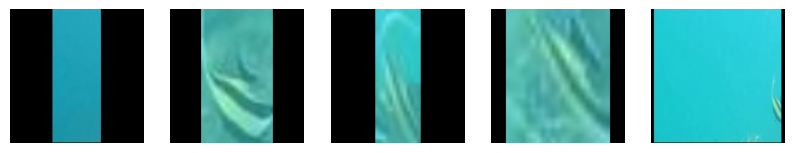

In [43]:
import cv2
import matplotlib.pyplot as plt
import os

fish_dir = "/content/cropped/fish"
fish_imgs = os.listdir(fish_dir)[:5]

plt.figure(figsize=(10,4))
for i, img_name in enumerate(fish_imgs):
    img = cv2.imread(os.path.join(fish_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


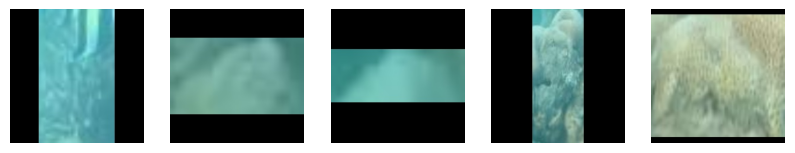

In [44]:
coral_dir = "/content/cropped/coral"
coral_imgs = os.listdir(coral_dir)[:5]

plt.figure(figsize=(10,4))
for i, img_name in enumerate(coral_imgs):
    img = cv2.imread(os.path.join(coral_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


In [45]:
!zip -r cropped_images.zip /content/cropped


  adding: content/cropped/ (stored 0%)
  adding: content/cropped/coral/ (stored 0%)
  adding: content/cropped/coral/coral_20s_mp4-0046_jpg.rf.7273f09a75ba5b711a9c4c17a3bf78f4.jpg (deflated 7%)
  adding: content/cropped/coral/coral_20s_mp4-0349_jpg.rf.644b4fc2524488f38a303afa691c4b47.jpg (deflated 12%)
  adding: content/cropped/coral/coral_20s_mp4-0248_jpg.rf.86dd8aa1672b3c824e91179466ae537d.jpg (deflated 17%)
  adding: content/cropped/coral/coral_20s_mp4-0063_jpg.rf.ed3fcdf393b700096b26fabfa508e4cd.jpg (deflated 7%)
  adding: content/cropped/coral/coral_20s_mp4-0188_jpg.rf.7d3576c682aedd997914a40b0493679b.jpg (deflated 2%)
  adding: content/cropped/coral/coral_20s_mp4-0171_jpg.rf.39dfa0909fc0ea31dd34ddc693ee1b81.jpg (deflated 1%)
  adding: content/cropped/coral/coral_20s_mp4-0238_jpg.rf.69b90a5f7365e45c1e2594393f3486a6.jpg (deflated 11%)
  adding: content/cropped/coral/coral_20s_mp4-0406_jpg.rf.1048be13a53a05d84e63774bd0d1b154.jpg (deflated 4%)
  adding: content/cropped/coral/coral_20s

In [46]:
from google.colab import files
files.download("cropped_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>